# Key vs Popularity

I want to investigate the correlation between the popularity of a song and the key its in.

Before we investigate its worth explaining how the dataset uses key.

In the dataset, key is a numerical value from 0-11, where each number refers to a musical key, with 0 being C, and working its way up from there, wrapping around to A after G# and ending with B.

## EDA

In [42]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
# Import dataset
df = pd.read_csv('dataset.csv')
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [44]:
df.tail()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.235,...,-16.393,1,0.0422,0.640,0.928,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.117,...,-18.318,0,0.0401,0.994,0.976,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.329,...,-10.895,0,0.0420,0.867,0.000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.506,...,-10.889,1,0.0297,0.381,0.000,0.2700,0.4130,135.960,4,world-music
113999,113999,2hETkH7cOfqmz3LqZDHZf5,Cesária Evora,Miss Perfumado,Barbincor,22,241826,False,0.526,0.487,...,-10.204,0,0.0725,0.681,0.000,0.0893,0.7080,79.198,4,world-music


We can drop the following columns:
- `Unnamed: 0` as it provides nothing to the dataset
- `track_id` as it doesnt provide anything important

In [45]:
df = df.drop(columns=df.columns[0], axis=1) # Using df.columns[0] as refering to it by name doesn't seem to work
df = df.drop(columns='track_id', axis=1)

In [46]:
df.isna().sum()

artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

We can see that artists, album_name, and track_name contain 1 missing value

In [47]:
df.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


Next we can check for outliers

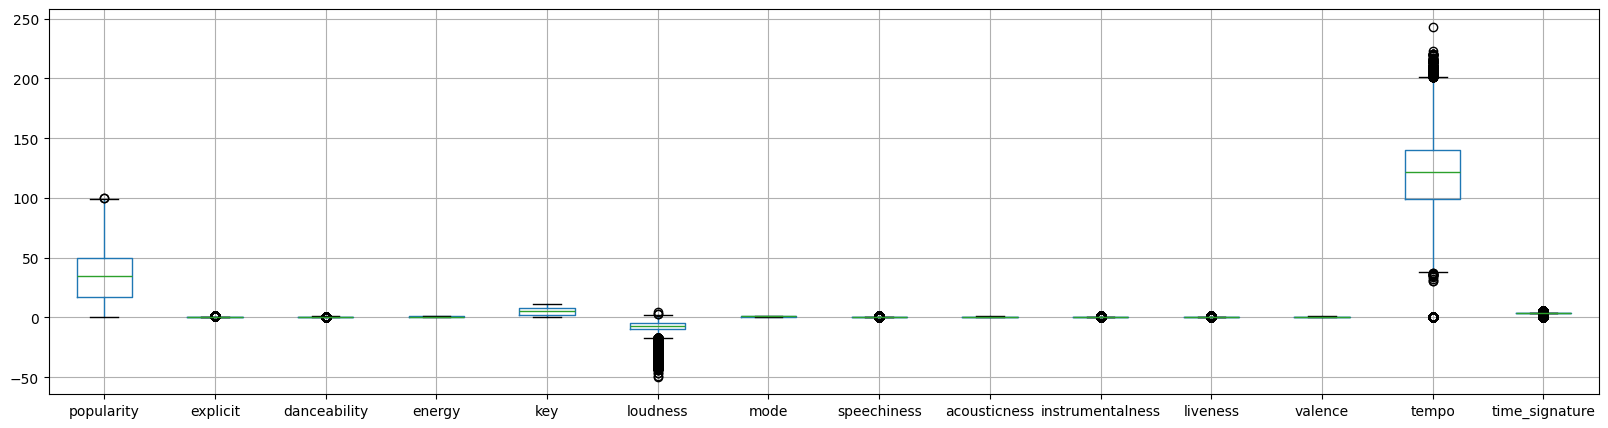

In [54]:

df.drop(columns='duration_ms').boxplot(figsize=(20, 5))
plt.show()

In [55]:
df.skew(numeric_only=True).sort_values(ascending=False)


duration_ms         11.195181
speechiness          4.647516
explicit             2.964731
liveness             2.105738
instrumentalness     1.734406
acousticness         0.727295
tempo                0.232295
valence              0.115078
popularity           0.046403
key                 -0.008500
danceability        -0.399497
mode                -0.572300
energy              -0.597001
loudness            -2.006542
time_signature      -4.098317
dtype: float64

In [ ]:
outliers = ['popularity', 'duration_ms', 'explicit', 'danceability', 
            'loudness', 'speechiness', 'instrumentalness', 'liveness',
            'tempo', 'time_signature']

non_outliers = ['energy', 'key', 'mode', 'accousticness', 'valence']


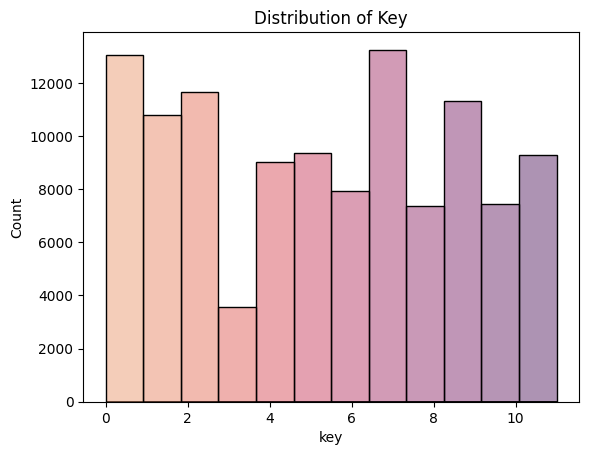

In [48]:
colours = sns.color_palette('flare', 12)
sns.histplot(data=df, x='key', bins=12, palette=colours, hue='key', legend=False)
plt.title("Distribution of Key")
plt.show()

Most popular keys are 0 (C), and 7 (G).  
Least popular key is 3 (Eb).

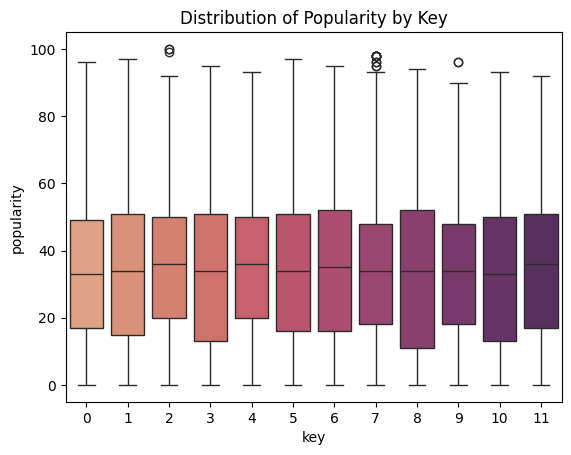

In [49]:
colours = sns.color_palette('flare', 12)
sns.boxplot(data=df, x='key', y='popularity', palette=colours, hue='key', legend=False)
plt.title("Distribution of Popularity by Key")
plt.show()

Popularity is consistent among all keys (despite a few outliers).

### Further exploring
We can also factor in genres to see if that plays a factor in the songs popularity from key. Certain genres might use different keys, lets use the 8 most popular genres


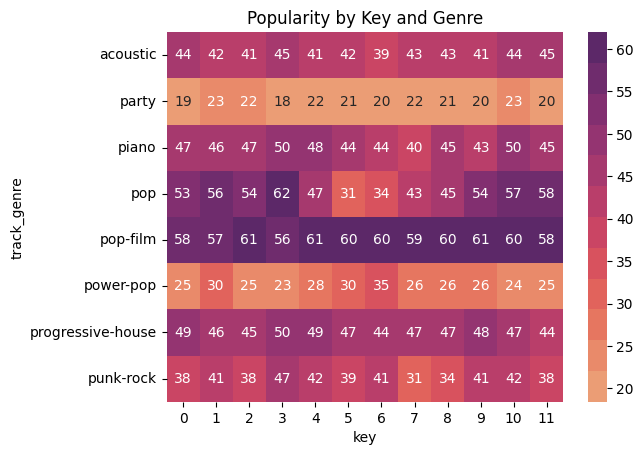

In [50]:
filtered_df = df[df['track_genre'].isin(df['track_genre'].value_counts().nlargest(8).index)]
map = filtered_df.pivot_table(columns='key', index='track_genre', values='popularity', aggfunc='mean')
sns.heatmap(map, cmap=colours, annot=True)
plt.title("Popularity by Key and Genre")
plt.show()

Unsurprisingly, pop-film and pop are the msot popular.  
Most genres seems to have a pretty even distribution, except for pop.  
In pop there seems to be an uneven distribution in key, with 4-8 being far less popular.

In [51]:
df.to_csv('EDA-tracks.csv', index=False)